In [1]:
setwd("../../")
source(".Rprofile")
setwd("./evaluation/analysis")

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
data <- read_csv("../results/noise.csv")
data <- data %>% filter(noise_level < 1 ) %>%
  mutate(across("dataset", str_replace, "merfish_mouse_hypothalamic", "MERFISH")) %>%
  mutate(across("dataset", str_replace, "visium_human_DLPFC", "Visium")) %>%
  mutate(across("dataset", str_replace, "stereo_mouse_embryo", "Stereo-seq"))
data$dataset <- factor(data$dataset, levels = c("Visium","MERFISH","Stereo-seq"))
head(data,4)

Rows: 264 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dataset
dbl (8): seed, noise, celltype_score, euclidean_dis, global_score, noise_lev...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,seed,noise,celltype_score,euclidean_dis,global_score,noise_level,region_score,run_time
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,0,0.0,0.7431379,0.05490357,0.4915783,0.0,0.6581410,17.54886
MERFISH,0,0.1,0.7407985,0.05679757,0.4887711,0.1,0.6548659,17.01980
MERFISH,0,0.2,0.7365876,0.05685091,0.4889270,0.2,0.6565814,14.52929
MERFISH,0,0.3,0.7381472,0.05713842,0.4883032,0.3,0.6548659,15.20768


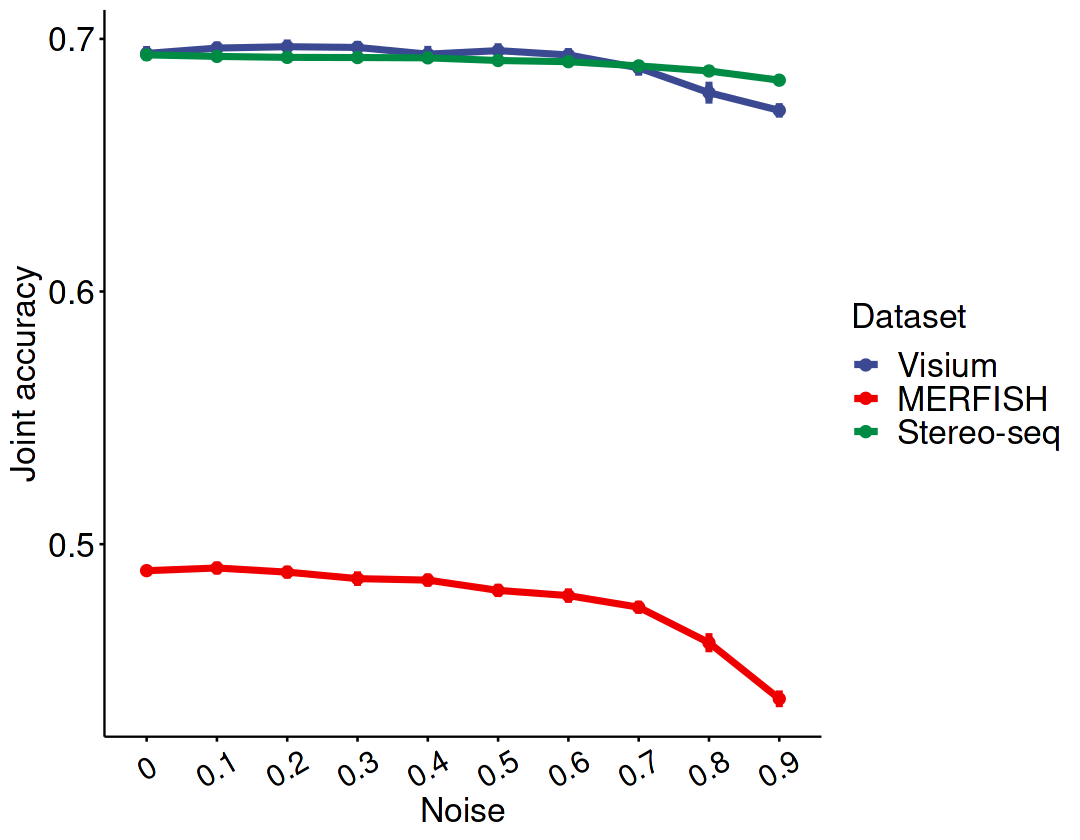

In [3]:
options(repr.plot.width=9, repr.plot.height=7)
ggline(data, x="noise", y="global_score", palette="aaas", color="dataset",
     add="mean_se", xlab="Noise", ylab="Joint accuracy", size=1.5, lab.size=10,
     legend.title = "Dataset",) %>% 
ggpar(legend="right", font.legend=20, font.subtitle=20, font.xtickslab=18, font.ytickslab=20, font.y=20, font.x=20) + 
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5))

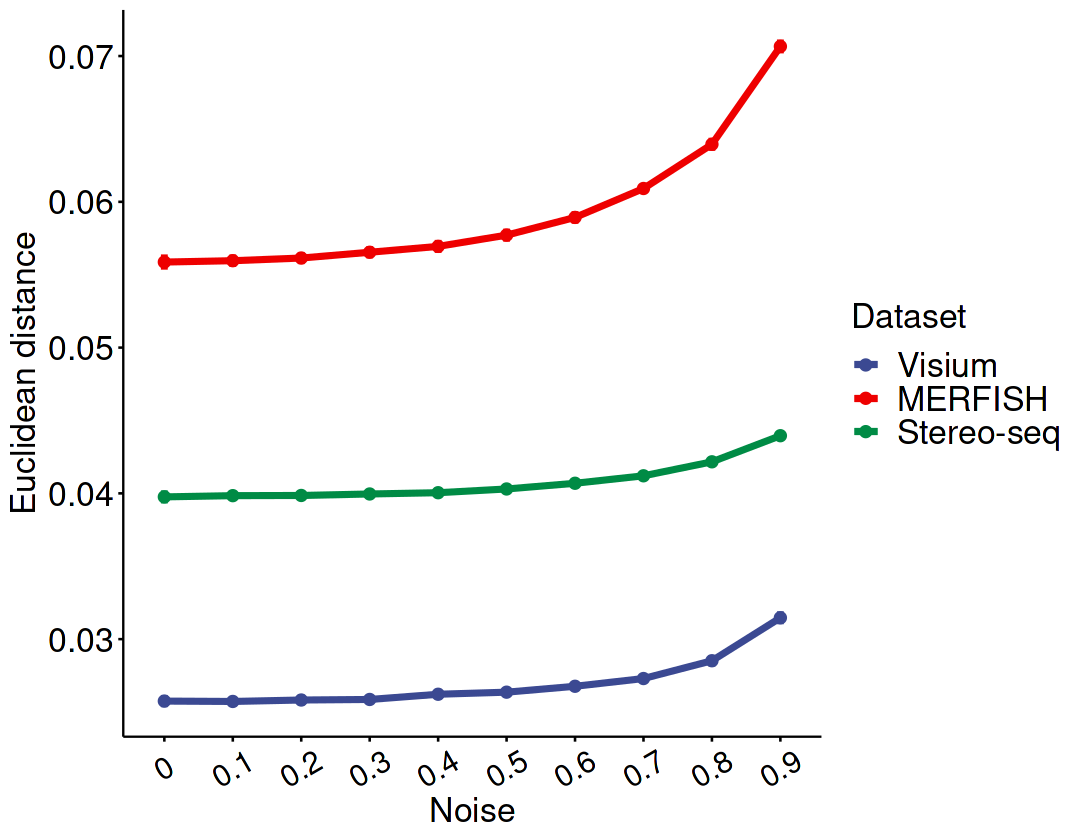

In [4]:
options(repr.plot.width=9, repr.plot.height=7)
ggline(data, x="noise", y="euclidean_dis", palette="aaas", color="dataset",
     add="mean_se", xlab ="Noise" ,ylab="Euclidean distance", size=1.5, lab.size=10,
     legend.title = "Dataset") %>% 
ggpar(legend="right", font.legend=20, font.subtitle=20, font.xtickslab=18, font.ytickslab=20, font.y=20, font.x=20) +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5))